In [1]:
#Import everything#
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
#Bring in the Datasets #
genuine_tweets = pd.read_csv("C:/Twitter/genuine_accounts/tweets.csv")
genuine_users = pd.read_csv("C:/Twitter/genuine_accounts/users.csv")

C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sbot_tweets_1 = pd.read_csv("C:/Twitter/social_spambots_1/tweets.csv")
sbot_users_1 = pd.read_csv("C:/Twitter/social_spambots_1/users.csv")
sbot_tweets_2 = pd.read_csv("C:/Twitter/social_spambots_2/tweets.csv")
sbot_users_2 = pd.read_csv("C:/Twitter/social_spambots_2/users.csv")
sbot_tweets_3 = pd.read_csv("C:/Twitter/social_spambots_3/tweets.csv")
sbot_users_3 = pd.read_csv("C:/Twitter/social_spambots_3/users.csv")
ffollow_users = pd.read_csv("C:/Twitter/fake_followers/users.csv")
ffollow_tweets = pd.read_csv("C:/Twitter/fake_followers/tweets.csv")

C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
list(genuine_tweets)

['id',
 'text',
 'source',
 'user_id',
 'truncated',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'in_reply_to_screen_name',
 'retweeted_status_id',
 'geo',
 'place',
 'contributors',
 'retweet_count',
 'reply_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'num_hashtags',
 'num_urls',
 'num_mentions',
 'created_at',
 'timestamp',
 'crawled_at',
 'updated']

In [5]:
tbot_tweets = pd.read_csv("C:/Twitter/traditional_spambots_1/tweets.csv")
tbot_users_1 = pd.read_csv("C:/Twitter/traditional_spambots_1/users.csv")
tbot_users_2 = pd.read_csv("C:/Twitter/traditional_spambots_2/users.csv")
tbot_users_3 = pd.read_csv("C:/Twitter/traditional_spambots_3/users.csv")
tbot_users_4 = pd.read_csv("C:/Twitter/traditional_spambots_4/users.csv")

In [6]:
#Re-attach the separated dataframes

sbot_tweets = pd.concat([sbot_tweets_1, sbot_tweets_2, sbot_tweets_3])
sbot_users = pd.concat([sbot_users_1, sbot_users_2, sbot_users_3])
tbot_users = pd.concat([tbot_users_1, tbot_users_2, tbot_users_3, tbot_users_4])

C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [7]:
#Now create a label for where tweets and users came from and attach all datasets together 

sbot_tweets['origin'] = 'socialbot'
genuine_tweets['origin'] = 'real'
ffollow_tweets['origin'] = 'followbot'
tbot_tweets['origin'] = 'tbot'

sbot_users['origin'] = 'socialbot'
genuine_users['origin'] = 'real'
ffollow_users['origin'] = 'followbot'
tbot_users['origin'] = 'tbot'

In [8]:
##in order to run well on the laptop, time to trim down the dataset into purely english users. 

ffollow_users_eng = ffollow_users[ffollow_users['lang'] == 'en']
genuine_users_eng = genuine_users[genuine_users['lang'] == 'en']
sbot_users_eng = sbot_users[sbot_users['lang'] == 'en']
tbot_users_eng = tbot_users[tbot_users['lang'] == 'en']


In [9]:
### Done -> Merge users to tweets on left join, with users being the left and tweets being the right, these 3 datasets. 
#(Basically the tweets need to just be english ))
### Next step: combined sets still need a filter to keep only ASCII characters - with the risk of deleting important emoji data
## memory error -> Idea: Split up genuine dataset into a couple, or filter out just 50k
### Then take 33,333 datapoints from each of them if possible to create 100k size dataset.
### Then combine datasets

In [10]:
#Sorting in order to check user_id values
genuine_tweets.sort_values(by=['user_id'])

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,origin
0,593932392663912449,RT @morningJewshow: Speaking about Jews and co...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,5.939322e+17,NaN,...,NaN,NaN,0.0,0.0,1.0,Fri May 01 00:18:11 +0000 2015,2015-05-01 02:18:11,2015-05-01 12:57:19,2015-05-01 12:57:19,real
2125,547384258701312001,RT @chrisgeidner: Thirty-Five Injured In Attac...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,5.471446e+17,NaN,...,NaN,NaN,0.0,1.0,2.0,Tue Dec 23 13:32:31 +0000 2014,2014-12-23 14:32:31,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2126,547382436011995136,RT @tanehisicoates: This @HeerJeet ethering is...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,5.472183e+17,NaN,...,NaN,NaN,0.0,1.0,2.0,Tue Dec 23 13:25:17 +0000 2014,2014-12-23 14:25:17,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2127,547379659630190593,RT @tanehisicoates: People arguing we should c...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,5.471561e+17,NaN,...,NaN,NaN,0.0,0.0,1.0,Tue Dec 23 13:14:15 +0000 2014,2014-12-23 14:14:15,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2128,547377097954832384,@jelani9 Oy. I can't believe you had to spell ...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,5.471531e+17,1.415591e+07,jelani9,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,3.0,Tue Dec 23 13:04:04 +0000 2014,2014-12-23 14:04:04,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2129,547374989729873920,RT @tanehisicoates: People think Goldwater con...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,5.472230e+17,NaN,...,NaN,NaN,0.0,0.0,1.0,Tue Dec 23 12:55:41 +0000 2014,2014-12-23 13:55:41,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2130,547276916831449088,Awaiting the moment mums of North America begi...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,...,NaN,NaN,1.0,0.0,0.0,Tue Dec 23 06:25:59 +0000 2014,2014-12-23 07:25:59,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2131,547267956552388608,The important thing is that you must have deep...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,...,NaN,NaN,1.0,0.0,0.0,Tue Dec 23 05:50:23 +0000 2014,2014-12-23 06:50:23,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2132,547239980976705536,@esmecomfort that would be truly hard for me t...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",6.780330e+05,NaN,5.472327e+17,1.202174e+08,esmecomfort,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,1.0,Tue Dec 23 03:59:13 +0000 2014,2014-12-23 04:59:13,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2133,547239573420388353,@sandyanne57 thanks! Happy Christmas! @marikot...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",6.780330e+05,NaN,5.472312e+17,8.259076e+08,sandyanne57,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,2.0,Tue Dec 23 03:57:36 +0000 2014,2014-12-23 04:57:36,2015-05-01 12:57:22,2015-05-01 12:57:22,real


In [11]:
genuine_tweets.head()

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,origin
0,593932392663912449,RT @morningJewshow: Speaking about Jews and co...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,5.939322e+17,NaN,...,NaN,NaN,0.0,0.0,1.0,Fri May 01 00:18:11 +0000 2015,2015-05-01 02:18:11,2015-05-01 12:57:19,2015-05-01 12:57:19,real
1,593895316719423488,This age/face recognition thing..no reason pla...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,0.0,Thu Apr 30 21:50:52 +0000 2015,2015-04-30 23:50:52,2015-05-01 12:57:19,2015-05-01 12:57:19,real
2,593880638069018624,Only upside of the moment I can think of is th...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,...,NaN,NaN,2.0,0.0,0.0,Thu Apr 30 20:52:32 +0000 2015,2015-04-30 22:52:32,2015-05-01 12:57:19,2015-05-01 12:57:19,real
3,593847955536252928,If you're going to think about+create experien...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,...,NaN,NaN,2.0,0.0,0.0,Thu Apr 30 18:42:40 +0000 2015,2015-04-30 20:42:40,2015-05-01 12:57:19,2015-05-01 12:57:19,real
4,593847687847350272,Watching a thread on FB about possible future ...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,0.0,Thu Apr 30 18:41:36 +0000 2015,2015-04-30 20:41:36,2015-05-01 12:57:19,2015-05-01 12:57:19,real


In [12]:
#Abbreviate columns to just relevant ones 
sbot_abbr = sbot_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]
genuine_abbr = genuine_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]
ffollow_abbr = ffollow_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]
tbot_abbr = tbot_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]

In [13]:
#Eliminate any rows with empty values 
sbot_abbr_clean = sbot_abbr.dropna()
genuine_abbr_clean = genuine_abbr.dropna()
ffollow_abbr_clean = ffollow_abbr.dropna()
tbot_abbr_clean = tbot_abbr.dropna()

In [14]:
#Turn all id's into integers.
genuine_abbr_clean['user_id'] = genuine_abbr_clean['user_id'].astype('int64')
sbot_abbr_clean['user_id'] = sbot_abbr_clean['user_id'].astype('int64')
ffollow_abbr_clean['user_id'] = ffollow_abbr_clean['user_id'].astype('int64')
tbot_abbr_clean['user_id'] = tbot_abbr_clean['user_id'].astype('int64')

C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [15]:
genuine_id_list = list(genuine_users_eng['id'][:500])
sbot_id_list = list(sbot_users_eng['id'][:500])

In [16]:
idx = 0 

genuine_tweets_set = []

while idx < 280000:
    if genuine_abbr_clean.iloc[idx, 1] in genuine_id_list :
        genuine_tweets_set.append(genuine_tweets.iloc[idx, :])
    idx += 1 
    
genuine_tweets_df = pd.DataFrame(genuine_tweets_set)

In [17]:
#Do the same but for sbot

In [18]:
#Length of 46,191 sbot tweets

idx = 0 

sbot_tweets_set = []

while idx < 280000:
    if sbot_abbr_clean.iloc[idx, 1] in sbot_id_list :
        sbot_tweets_set.append(sbot_tweets.iloc[idx, :])
    idx += 1 
    
sbot_tweets_df = pd.DataFrame(sbot_tweets_set)

In [19]:
#Language data is not provided for the traditional bot users, so we will not include these in our sample. 

#tbot_users_eng.sort_values(by=['id'])
#test = pd.merge(tbot_users, tbot_tweets, how='inner', left_on='id', right_on='user_id')
#tbot_tweets

In [20]:
# Merge, then trim down the datasets here
genuine_combined_eng = pd.merge(genuine_users_eng, genuine_tweets_df, how='inner', left_on = 'id', right_on = 'user_id')
sbot_combined_eng = pd.merge(sbot_users_eng, sbot_tweets_df, how='inner', left_on = 'id', right_on = 'user_id')

In [21]:
#Complete prepping the rest of the data

genuine_combined_eng = genuine_combined_eng[['id_x', 'name', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'created_at_y', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'origin_x']]
genuine_combined = genuine_combined_eng.dropna()
sbot_combined_eng = sbot_combined_eng[['id_x', 'name', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'created_at_y', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'origin_x']]
sbot_combined = sbot_combined_eng.dropna()

ffollow_combined_eng = pd.merge(ffollow_users_eng, ffollow_tweets, how='inner', left_on = 'id', right_on='user_id')
ffollow_combined= ffollow_combined_eng[['id_x', 'name', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'created_at_y', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'origin_x']]


In [22]:
#TO DO -> Shuffle the dataframe before slicing
ffollow_combined = ffollow_combined.sample(frac=1)
genuine_combined = genuine_combined.sample(frac=1)
sbot_combined = sbot_combined.sample(frac=1)


#dataframe.sample frac = 1 (find a better way to shuffle the dataframe -> Returns a shuffled frame) 

In [23]:
#Trim the size of these dang datatsets 
#Also assemble our test, validation, and test sets
ffollow_combined_eng_cut = ffollow_combined[:24000]
validation_cut_1 = ffollow_combined[24000:32000]
test_cut_1 = ffollow_combined[32000:40000]
genuine_combined_eng_cut = genuine_combined[:24000]
validation_cut_2 = genuine_combined[24000:32000]
test_cut_2 = genuine_combined[32000:40000]
sbot_combined_eng_cut = sbot_combined[:24000]
validation_cut_3 = sbot_combined[24000:32000]
test_cut_3 = sbot_combined[32000:40000]



In [24]:
#Combine the datasets together 
all_tweets = pd.concat([sbot_combined_eng_cut, ffollow_combined_eng_cut, genuine_combined_eng_cut])
validation_cut = pd.concat([validation_cut_1, validation_cut_2, validation_cut_3])
test_cut = pd.concat([test_cut_1, test_cut_2, test_cut_3])

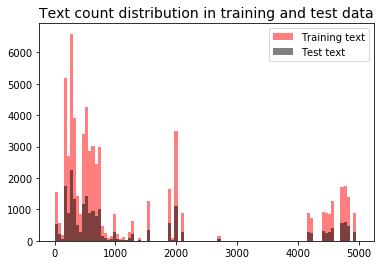

'\nThe feature distribution of the training sample and the test sample, at least in terms of friends, seems similar enough between the\ntwo conditions. This suggests a good level of external validity in test results. \n'

In [25]:
train = all_tweets['friends_count']
test = test_cut['friends_count']
bins = np.linspace(0, 5000, 100)

plt.hist(train, bins, alpha=0.5, label='Training text', color='red')
plt.hist(test, bins, alpha=0.5, label='Test text', color='black')
plt.xlabel('')
plt.legend(loc='upper right')
plt.title('Text count distribution in training and test data', fontsize=14)
plt.show()

"""
The feature distribution of the training sample and the test sample, at least in terms of friends, seems similar enough between the
two conditions. This suggests a good level of external validity in test results. 
"""

In [26]:
#Bring in Natural Language Processing Tools
import nltk 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0)
#Look at nltk resources then begin! 

In [27]:
#Make this generic function work for my case


def make_xy(tweets, vectorizer=None):
        
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(tweets.text)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (tweets['origin_x'] == 'real').values.astype(np.int)
    return X, y

#X, y = make_xy(all_tweets)


In [28]:
all_tweets = all_tweets.dropna()

In [29]:
vectorizer.fit(all_tweets['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [30]:
x = vectorizer.transform(all_tweets['text'])

In [31]:
#Where I'm at now-> I've trained 'x', which I think is a vocabulary assembled out of all these tweets... 
#though it's very hard to look at and a sample just displays lots of goobled up numbers.
#SO now the question is how to go from this goobled up number set to actual predictions. 

# I think I'm supposed to begin categorizing/scoring the data somehow, but I don't know how exactly.

In [32]:
sbot_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3457133 entries, 0 to 1418556
Data columns (total 26 columns):
id                         int64
text                       object
source                     object
user_id                    int64
truncated                  float64
in_reply_to_status_id      int64
in_reply_to_user_id        int64
in_reply_to_screen_name    object
retweeted_status_id        int64
geo                        float64
place                      object
contributors               float64
retweet_count              int64
reply_count                int64
favorite_count             int64
favorited                  float64
retweeted                  float64
possibly_sensitive         float64
num_hashtags               int64
num_urls                   int64
num_mentions               int64
created_at                 object
timestamp                  object
crawled_at                 object
updated                    object
origin                     object
dtypes: 

In [33]:
#-----------------------------------------tf-idf--------------------------------

In [34]:
#Trim to necessity later. define functions solely for their use. 



def top_tfidf_featstop_tfid (row, features, top_n=10):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=10):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=10):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=10):
    dfs = []
    #labels = np.unique(y)
    labels = [2,7]
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(8, 30), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        #z = int(str(int(i/3)+1) + str((i%3)+1))
        ax = fig.add_subplot(9, 1, i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=16)
        ax.set_ylabel("Word", labelpad=16, fontsize=16)
        ax.set_title("Class = " + str(df.label), fontsize=18)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [35]:
all_tweets

,id_x,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at_y,text,num_hashtags,num_urls,num_mentions,origin_x
20809,237359828,Matilda Combs,Matildadr89,514,4870,5350,0,8,Fri Aug 15 08:43:41 +0000 2014,mi è esploso il cuore in mano. ed ora ci sono...,0.0,0.0,0.0,socialbot
37290,434756188,Aldo Urro,HudsonAldenlvc,460,3800,4185,0,2,Tue Sep 23 14:26:06 +0000 2014,Quando gioco a pallina col mio cane gli faccio...,0.0,0.0,0.0,socialbot
19560,237346330,Carla Lessieri,Lessieri73,449,5359,5595,0,5,Wed May 21 14:50:00 +0000 2014,"""La felicità più grande non sta nel non cadere...",0.0,0.0,0.0,socialbot
45350,465401166,Volk Silvers,ViolaTorino,275,3831,4216,0,1,Fri Aug 29 13:20:43 +0000 2014,Pesto alla Diaz #menucreativi,1.0,0.0,0.0,socialbot
34400,434732328,Jorden Leonardo,Jordenoza,507,4032,4414,0,5,Fri Jul 04 06:59:59 +0000 2014,"Il cuore dello stupido è nella sua bocca, ma l...",0.0,0.0,0.0,socialbot
32396,434729769,Isacco Tombolini,IsaccoTombo,458,4447,4807,0,1,Wed Aug 20 14:24:23 +0000 2014,"Credevo di avere delle idee, invece era solo u...",0.0,0.0,0.0,socialbot
28365,418371090,Caterina,Torrezuuh,469,4822,5207,0,6,Fri Oct 31 21:57:59 +0000 2014,Quando i ricchi furfanti hanno bisogno di quel...,0.0,0.0,0.0,socialbot
8568,237197647,Ester Walsh,EsterWalshgm75,311,124,0,0,0,Thu Oct 30 22:04:13 +0000 2014,voglioavvertireimieiamicichehorottolabarraspaz...,0.0,0.0,0.0,socialbot
32452,434729769,Isacco Tombolini,IsaccoTombo,458,4447,4807,0,1,Tue Aug 12 05:28:31 +0000 2014,I grandi Dubbi!! Ma se la poppa sta dietro per...,0.0,0.0,0.0,socialbot
43755,465379325,Renzo Bandieri,RenzoBandieri,121,0,0,0,0,Mon Oct 13 17:37:52 +0000 2014,"Per il miserabile, voler imitare il potente è ...",0.0,0.0,0.0,socialbot


In [36]:
#Need tfidf transform first
from sklearn.feature_extraction.text import TfidfVectorizer
def top_tfidf_feats(row, features, top_n=10):
    topn_ids = np.argsort(row)[::-1][:top_n] #<--- argsort? 
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf'] #<--- Makes dataframe of top 10 most common features 
    return df

tfidf = TfidfVectorizer(min_df=6, max_df=0.75).fit(all_tweets["text"])

In [37]:
##Next Step: Modify this into what it needs to be 




Xtrain = tfidf.fit_transform(all_tweets["text"])
y = all_tweets["origin_x"]
features = tfidf.get_feature_names()
top_dfs = top_feats_by_class(Xtrain, y, features)

C:\Users\cct51\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\cct51\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [38]:
top_dfs

[         feature  tfidf
 0             저도    NaN
 1  followmegarth    NaN
 2           food    NaN
 3        fonzies    NaN
 4          fonte    NaN
 5          fondo    NaN
 6   fondieuropei    NaN
 7      fondatore    NaN
 8        fondato    NaN
 9        fondata    NaN,          feature  tfidf
 0             저도    NaN
 1  followmegarth    NaN
 2           food    NaN
 3        fonzies    NaN
 4          fonte    NaN
 5          fondo    NaN
 6   fondieuropei    NaN
 7      fondatore    NaN
 8        fondato    NaN
 9        fondata    NaN]

In [39]:
TfidfVectorizer?

In [40]:
top_dfs = top_tfidf_feats(tfidf, y)

KeyError: 0

In [ ]:
top_dfs

In [ ]:
all_tweets["text"]

In [ ]:
print(top_dfs)

In [ ]:
#---------------------------------------------(Unfinished text counting part begins)-------------------------------------------

In [ ]:
# Calculate frequency distribution
words = (all_tweets['text'].tolist()[0])


import nltk


fdist = nltk.FreqDist(words)

# Output top 50 words

for word, frequency in fdist.most_common(50):
    print(u'{};{}'.format(word, frequency))

In [ ]:
#all_tweets['text']

all_tweets['text'][1][2]

In [ ]:
#----------------------------------------------(Unfinished text counting part ends) -----------------------------------------

In [ ]:
#PROBLEM: What is going on with this plot?
plot_tfidf_classfeats_h(top_dfs)

In [ ]:
#-----------------------------Word and model processing----------------------------------------

Text(0,0.5,'Percent of df')

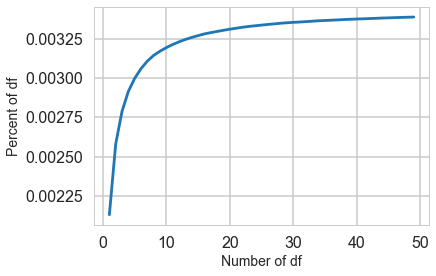

In [41]:
#In order to tune hyperparameters of our count vectorizer, let's look
#for an elbow value that captures a sizeable portion of our dataframe
#without overfitting.

#set up grid
sns.set_style("whitegrid")
sns.set_context("poster")

# plot to find minimum df
vectorizer = CountVectorizer(min_df=1)
X,y = make_xy(all_tweets,vectorizer=vectorizer)
dfs = []
for i in range(1,50):
    vectorizer = CountVectorizer(max_df=i)
    X,y = make_xy(all_tweets,vectorizer=vectorizer)
    dfs.append(X.shape[1])
dfs_percent = [df/31690362 for df in dfs]
plt.plot(range(1,50),dfs_percent)
plt.xlabel('Number of df', fontsize=14)
plt.ylabel('Percent of df', fontsize=14)

#The graph shows an elbow in the graph around a min_df of about
#6 or 7. This will define the CountVectorizer as we move forward


In [43]:
#Simplifying columns, reducing origin to a single word.
all_tweets2 = all_tweets.rename(index=str, columns={"id_x": "id", "name": "name", "screen_name": "screen_name", "statuses_count":"statuses_count", "followers_count":"followers_count", "friends_count":"friends_count", "favourites_count":"favorites_count", "listed_count": "listed_count", "created_at_y":"created_at", "text": "text", "num_hashtags":"num_hashtags", "num_urls":"num_urls", "num_mentions":"num_mentions", "origin_x":"origin"})
validation_cut2 = validation_cut.rename(index=str, columns={"id_x": "id", "name": "name", "screen_name": "screen_name", "statuses_count":"statuses_count", "followers_count":"followers_count", "friends_count":"friends_count", "favourites_count":"favorites_count", "listed_count": "listed_count", "created_at_y":"created_at", "text": "text", "num_hashtags":"num_hashtags", "num_urls":"num_urls", "num_mentions":"num_mentions", "origin_x":"origin"})
test_cut2 = test_cut.rename(index=str, columns={"id_x": "id", "name": "name", "screen_name": "screen_name", "statuses_count":"statuses_count", "followers_count":"followers_count", "friends_count":"friends_count", "favourites_count":"favorites_count", "listed_count": "listed_count", "created_at_y":"created_at", "text": "text", "num_hashtags":"num_hashtags", "num_urls":"num_urls", "num_mentions":"num_mentions", "origin_x":"origin"})

In [44]:
from sklearn.model_selection import train_test_split

y = all_tweets2['origin']
X_train, X_test, y_train, y_test = train_test_split(all_tweets2['text'], y, test_size=0.33, random_state=53)

In [45]:
def word_vect(vectorizer):
    train = vectorizer.fit_transform(X_train.values)
    test = vectorizer.transform(X_test.values)
    return vectorizer,train,test

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer,count_train,count_test = word_vect(vectorizer = CountVectorizer(min_df=6, stop_words='english'))
print('features length of counter vectorizer: ', len(count_vectorizer.get_feature_names()))

features length of counter vectorizer:  9806


In [46]:
print(vectorizer.get_feature_names())

['00001', '000010000000001000010000', '000052736', '0001', '000for', '000円引', '000円引②１人部屋追加代金割引3', '000円引③3名１室利用割引', '000円引さらにヨーロッパ', '001', '002', '005', '007', '0075', '008', '00917146', '00917146600', '00977', '00am', '00gmu8nnv2', '00jq9gh0dq', '00pm', '00snowflake', '00น', '01', '010', '011', '012', '013014neverforget', '01606', '017vswqbdm', '018428ec8e', '019', '01914904660', '01xcandyx01', '02', '020', '0240', '02521', '0255', '0268', '027', '0279663472', '02zbmyopfh', '03', '037', '03noecuw', '040', '044gq33y3i', '045', '04ofkogfrv', '04xkwouw5x', '051', '05kq3ktorx', '05pm', '05wgjorwrk', '06', '0616', '06am', '06kvusk00g', '06oszjla6t', '07', '070', '07eq4udj5y', '07fscm9zoy', '07لندن', '07محمد', '08', '0800', '0877http', '087b', '08izsdgy', '08uheqjksz', '09', '090', '090112', '0924qu8t63095jrghwpe09uj0pwhr', '09411424250', '09ptzksjup', '09ty9eoa03as', '0_o', '0a', '0a46rvttfx', '0a8cownocp', '0alglmn79h', '0bhjchex', '0ceien4jv0', '0cjxozet', '0cveberpgv', '0dcmnip95v', '

In [ ]:
#Big picture problem: Looks like the validation_cut and test_cut
#don't have many, if any English tweets at all. Might need to take
#a smaller sample size out of the data and take 3 cuts from that.

In [47]:
# Model #1: Unmodified model 

from sklearn.model_selection import train_test_split
import sklearn.naive_bayes

#1. Initialize a vectorizer with min_df of 0
vectorizer = CountVectorizer(min_df=0)

#2. Create a new Multinomial classifier model with trial alpha
model = sklearn.naive_bayes.MultinomialNB(alpha=1)

#3. Fit the vectorizer to get all of the quotes into the appropriate format
vectorizer.fit_transform(all_tweets.text)

#4. Make X, y for training sets 
X, y = make_xy(all_tweets, vectorizer)





In [48]:
#5. Fit the model to the transformed quotes
model.fit(X, y)

#5.5 Transform new section into an appropriate array?

#6. Transform the new quote into appropriate form, an array that's basically
#a checklist of all words currently in it.
#new_quote = vectorizer.transform(a_quote)

test_cut = test_cut.dropna()
testX = vectorizer.transform(test_cut.text)
testX = testX.tocsc()
testy = (test_cut['origin_x'] == 'real').values.astype(np.int)

#7. Make a prediction on the new quote based on the fitted, transformed quote 
#base that we've been working on.
model.score(testX, testy)

#Our unmodified model is about 80% accurate at predicting whether a 

0.8038169847487291

In [49]:
# Model #2: tfidf model 

from sklearn.model_selection import train_test_split
import sklearn.naive_bayes

#1. Initialize a vectorizer with min_df of 0
vectorizer = TfidfVectorizer(stop_words='english', min_df=0)

#2. Create a new Multinomial classifier model with trial alpha
model = sklearn.naive_bayes.MultinomialNB(alpha=1)

#3. Fit the vectorizer to get all of the quotes into the appropriate format
vectorizer.fit_transform(all_tweets.text)

#4. Make X, y for training sets 
X, y = make_xy(all_tweets, vectorizer)





In [50]:
#5. Fit the model to the transformed quotes
model.fit(X, y)

#5.5 Transform new section into an appropriate array?

#6. Transform the new quote into appropriate form, an array that's basically
#a checklist of all words currently in it.
#new_quote = vectorizer.transform(a_quote)

test_cut = test_cut.dropna()
testX = vectorizer.transform(test_cut.text)
testX = testX.tocsc()
testy = (test_cut['origin_x'] == 'real').values.astype(np.int)

#7. Make a prediction on the new quote based on the fitted, transformed quote 
#base that we've been working on.
model.score(testX, testy)

#Our unmodified model is about 80% accurate at predicting whether a 

0.8720310025835486

In [ ]:
#Look at that! tfidf vectorizer is 87.2% effective at identifying twitter fakes. 

In [51]:
#Now let's run a model with Random Forest to see if we can make an even more
#accurate set of predictions.
from sklearn.ensemble import RandomForestClassifier




In [52]:

#1. Initialize Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

#2. Fit to test X and y from tf-idf set
clf.fit(X, y)

#blahblah
#y, _ = pd.factorize(train['species'])
#clf.fit(train[features], y)


#3. Predict on testX set
predictions = clf.predict(testX)

#4. Score 
clf.score(testX, testy)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
#Interestingly enough, our Random Forest Classifier only scores 84.5%

0.8446120510042504

In [58]:
#Let's digest the importances of these variables. 

importances = list(clf.feature_importances_)


feature_list = list(tfidf.get_feature_names())

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

features = np.array(features)

In [60]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [61]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: 00                   Importance: 0.0
Variable: 000                  Importance: 0.0
Variable: 01                   Importance: 0.0
Variable: 02                   Importance: 0.0
Variable: 03                   Importance: 0.0
Variable: 04                   Importance: 0.0
Variable: 05                   Importance: 0.0
Variable: 06                   Importance: 0.0
Variable: 07                   Importance: 0.0
Variable: 08                   Importance: 0.0
Variable: 09                   Importance: 0.0
Variable: 10                   Importance: 0.0
Variable: 100                  Importance: 0.0
Variable: 1000                 Importance: 0.0
Variable: 10074                Importance: 0.0
Variable: 101                  Importance: 0.0
Variable: 103                  Importance: 0.0
Variable: 10yo                 Importance: 0.0
Variable: 11                   Importance: 0.0
Variable: 113                  Importance: 0.0
Variable: 12                   Importance: 0.0
Variable: 120

Variable: attenzione           Importance: 0.0
Variable: atterrare            Importance: 0.0
Variable: attesa               Importance: 0.0
Variable: atti                 Importance: 0.0
Variable: attimi               Importance: 0.0
Variable: attimo               Importance: 0.0
Variable: attitude             Importance: 0.0
Variable: attività             Importance: 0.0
Variable: atto                 Importance: 0.0
Variable: attorney             Importance: 0.0
Variable: attorno              Importance: 0.0
Variable: attract              Importance: 0.0
Variable: attracted            Importance: 0.0
Variable: attractive           Importance: 0.0
Variable: attrae               Importance: 0.0
Variable: attraggono           Importance: 0.0
Variable: attraverso           Importance: 0.0
Variable: attrazione           Importance: 0.0
Variable: até                  Importance: 0.0
Variable: au                   Importance: 0.0
Variable: auckland             Importance: 0.0
Variable: aud

Variable: comedy               Importance: 0.0
Variable: comedyandtruth       Importance: 0.0
Variable: comer                Importance: 0.0
Variable: comes                Importance: 0.0
Variable: comfortable          Importance: 0.0
Variable: comic                Importance: 0.0
Variable: comida               Importance: 0.0
Variable: comienza             Importance: 0.0
Variable: comigo               Importance: 0.0
Variable: comin                Importance: 0.0
Variable: comincia             Importance: 0.0
Variable: cominciamo           Importance: 0.0
Variable: cominciare           Importance: 0.0
Variable: cominciato           Importance: 0.0
Variable: comincio             Importance: 0.0
Variable: coming               Importance: 0.0
Variable: comisión             Importance: 0.0
Variable: comme                Importance: 0.0
Variable: commemorativo        Importance: 0.0
Variable: comment              Importance: 0.0
Variable: commentary           Importance: 0.0
Variable: com

Variable: filo                 Importance: 0.0
Variable: filosofeggiare       Importance: 0.0
Variable: filosofi             Importance: 0.0
Variable: filter               Importance: 0.0
Variable: filtra               Importance: 0.0
Variable: filtri               Importance: 0.0
Variable: fim                  Importance: 0.0
Variable: fin                  Importance: 0.0
Variable: final                Importance: 0.0
Variable: finale               Importance: 0.0
Variable: finally              Importance: 0.0
Variable: finalmente           Importance: 0.0
Variable: finals               Importance: 0.0
Variable: financial            Importance: 0.0
Variable: finanziaria          Importance: 0.0
Variable: finche               Importance: 0.0
Variable: finchè               Importance: 0.0
Variable: finché               Importance: 0.0
Variable: find                 Importance: 0.0
Variable: finding              Importance: 0.0
Variable: finds                Importance: 0.0
Variable: fin

Variable: hoo                  Importance: 0.0
Variable: hood                 Importance: 0.0
Variable: hook                 Importance: 0.0
Variable: hoop                 Importance: 0.0
Variable: hoor                 Importance: 0.0
Variable: hoover               Importance: 0.0
Variable: hop                  Importance: 0.0
Variable: hope                 Importance: 0.0
Variable: hopefully            Importance: 0.0
Variable: hopeless             Importance: 0.0
Variable: hopes                Importance: 0.0
Variable: hoping               Importance: 0.0
Variable: hora                 Importance: 0.0
Variable: horas                Importance: 0.0
Variable: horny                Importance: 0.0
Variable: hornyfacts           Importance: 0.0
Variable: horrible             Importance: 0.0
Variable: horror               Importance: 0.0
Variable: horse                Importance: 0.0
Variable: horses               Importance: 0.0
Variable: hosnana              Importance: 0.0
Variable: hos

Variable: linkedin             Importance: 0.0
Variable: links                Importance: 0.0
Variable: linksmanagement      Importance: 0.0
Variable: lion                 Importance: 0.0
Variable: lions                Importance: 0.0
Variable: lip                  Importance: 0.0
Variable: lips                 Importance: 0.0
Variable: lipstick             Importance: 0.0
Variable: liquid               Importance: 0.0
Variable: liquor               Importance: 0.0
Variable: lira                 Importance: 0.0
Variable: lishi                Importance: 0.0
Variable: list                 Importance: 0.0
Variable: lista                Importance: 0.0
Variable: listasabrasil        Importance: 0.0
Variable: listen               Importance: 0.0
Variable: listening            Importance: 0.0
Variable: listens              Importance: 0.0
Variable: listindiario         Importance: 0.0
Variable: listing              Importance: 0.0
Variable: listo                Importance: 0.0
Variable: lis

Variable: nuotare              Importance: 0.0
Variable: nuova                Importance: 0.0
Variable: nuove                Importance: 0.0
Variable: nuovi                Importance: 0.0
Variable: nuovo                Importance: 0.0
Variable: nut                  Importance: 0.0
Variable: nutella              Importance: 0.0
Variable: nuts                 Importance: 0.0
Variable: nuvole               Importance: 0.0
Variable: nvonae_              Importance: 0.0
Variable: nw                   Importance: 0.0
Variable: ny                   Importance: 0.0
Variable: nya                  Importance: 0.0
Variable: nyc                  Importance: 0.0
Variable: nye                  Importance: 0.0
Variable: nygrlahart           Importance: 0.0
Variable: nyo                  Importance: 0.0
Variable: nz                   Importance: 0.0
Variable: não                  Importance: 0.0
Variable: né                   Importance: 0.0
Variable: nós                  Importance: 0.0
Variable: o2 

Variable: proverbialità        Importance: 0.0
Variable: proverbio            Importance: 0.0
Variable: provi                Importance: 0.0
Variable: provide              Importance: 0.0
Variable: providence           Importance: 0.0
Variable: provides             Importance: 0.0
Variable: providing            Importance: 0.0
Variable: province             Importance: 0.0
Variable: provo                Importance: 0.0
Variable: provocandone         Importance: 0.0
Variable: próximo              Importance: 0.0
Variable: ps                   Importance: 0.0
Variable: ps3                  Importance: 0.0
Variable: psa                  Importance: 0.0
Variable: psichiatra           Importance: 0.0
Variable: psicologa            Importance: 0.0
Variable: psyched              Importance: 0.0
Variable: pt                   Importance: 0.0
Variable: pub                  Importance: 0.0
Variable: pubblica             Importance: 0.0
Variable: pubblici             Importance: 0.0
Variable: pub

Variable: royals               Importance: 0.0
Variable: rplopez71511         Importance: 0.0
Variable: rs                   Importance: 0.0
Variable: rss                  Importance: 0.0
Variable: rt                   Importance: 0.0
Variable: ru                   Importance: 0.0
Variable: rua                  Importance: 0.0
Variable: ruanda               Importance: 0.0
Variable: ruba                 Importance: 0.0
Variable: rubano               Importance: 0.0
Variable: rubare               Importance: 0.0
Variable: rubato               Importance: 0.0
Variable: rubel_lite           Importance: 0.0
Variable: rude                 Importance: 0.0
Variable: rudyard              Importance: 0.0
Variable: rughe                Importance: 0.0
Variable: ruin                 Importance: 0.0
Variable: ruined               Importance: 0.0
Variable: rule                 Importance: 0.0
Variable: rules                Importance: 0.0
Variable: rumor                Importance: 0.0
Variable: rum

Variable: spaghetti            Importance: 0.0
Variable: spagna               Importance: 0.0
Variable: spagnolo             Importance: 0.0
Variable: spain                Importance: 0.0
Variable: spalla               Importance: 0.0
Variable: spalle               Importance: 0.0
Variable: spam                 Importance: 0.0
Variable: spanish              Importance: 0.0
Variable: spara                Importance: 0.0
Variable: sparar               Importance: 0.0
Variable: sparare              Importance: 0.0
Variable: spare                Importance: 0.0
Variable: sparire              Importance: 0.0
Variable: spaziale             Importance: 0.0
Variable: spazio               Importance: 0.0
Variable: speak                Importance: 0.0
Variable: speaker              Importance: 0.0
Variable: speakers             Importance: 0.0
Variable: speaking             Importance: 0.0
Variable: speaks               Importance: 0.0
Variable: spears               Importance: 0.0
Variable: spe

Variable: training             Importance: 0.0
Variable: trains               Importance: 0.0
Variable: tramite              Importance: 0.0
Variable: tranne               Importance: 0.0
Variable: tranquilli           Importance: 0.0
Variable: tranquillità         Importance: 0.0
Variable: tranquillo           Importance: 0.0
Variable: transport            Importance: 0.0
Variable: trap                 Importance: 0.0
Variable: trapped              Importance: 0.0
Variable: trasforma            Importance: 0.0
Variable: trasformare          Importance: 0.0
Variable: trasformarti         Importance: 0.0
Variable: trash                Importance: 0.0
Variable: trata                Importance: 0.0
Variable: tratta               Importance: 0.0
Variable: trattano             Importance: 0.0
Variable: trattato             Importance: 0.0
Variable: trattenere           Importance: 0.0
Variable: trattenga            Importance: 0.0
Variable: tratti               Importance: 0.0
Variable: tra

Variable: الإعلامي             Importance: 0.0
Variable: الإيراني             Importance: 0.0
Variable: الاتحاد              Importance: 0.0
Variable: التحالف              Importance: 0.0
Variable: التعاون              Importance: 0.0
Variable: التواصل              Importance: 0.0
Variable: التي                 Importance: 0.0
Variable: الثاني               Importance: 0.0
Variable: الثلاثاء             Importance: 0.0
Variable: الجديدة              Importance: 0.0
Variable: الجمعة               Importance: 0.0
Variable: الجيش                Importance: 0.0
Variable: الحوثيين             Importance: 0.0
Variable: الخارجية             Importance: 0.0
Variable: الخميس               Importance: 0.0
Variable: الداخلية             Importance: 0.0
Variable: الدكتور              Importance: 0.0
Variable: الدولة               Importance: 0.0
Variable: الدولي               Importance: 0.0
Variable: الذكية               Importance: 0.0
Variable: الذي                 Importance: 0.0
Variable: الذ

In [ ]:
#Big Question for Lukas: Why are all of these features showing up as non-important?
#Are there just too many features, with no one feature standing out?


#Maybe if instead of analyzing just the words and this feature,
#If I could build a model that analyzed the all of the other initial variables 
#of the study, then this analysis would be more useful by pointing out which variabelsa re the most important for 
#predicting fakeness. But the question then is, how to make a model that 
#includes all of these variables? 

In [57]:
#Question for Lukas - Am I using Random Forest Classifier or Random Forest Regressor?
#Why?
#I think it's a classifier because we're really only looking betwen 2 qualitative
#choices for the set. 

In [ ]:
#Question for lukas - How/when do I reinstate the other variables that came 
#in the dataset, and utilize them to improve the model? 

In [ ]:
#next stepsL

1. Take output of vectorizer - DONE
1.5 Do tfidfVectorizer  - DONE
2. Treat like a collection of words, through a random forest